#Linear Regression 
1) Design Model (input, output size, forward pass)<br>
2) Construct loss and optimizer<br>
3) Trainging Loop<br>
      a) Forward Pass: compute prediction<br>
      b) backward Pass: Gradients<br>
      c) update weights<br>

In [2]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Preparing data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise= 20, random_state=1)
X_numpy.shape

(100, 1)

In [4]:
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))
Y

tensor([-5.5539e+01, -1.0662e+01,  2.2757e+01,  1.0110e+02,  1.4434e+02,
         3.3289e+01,  3.3015e+01, -2.5887e+01, -9.9639e+01,  2.3803e+01,
        -4.5589e+01, -8.3388e+00, -9.5315e+01,  3.6407e+01, -8.7293e+01,
         6.7669e+01, -1.3687e+01, -5.5441e+01, -6.5340e+01, -5.4450e+01,
        -2.8835e+01,  1.7884e+02,  6.5084e+01,  2.6668e+01, -1.8546e+01,
        -4.1499e+01,  8.5583e-01,  4.4562e+01,  1.1598e+02, -6.4620e+01,
        -2.5931e+01, -6.0882e+01,  1.8720e+01,  7.5070e+01,  1.1720e+02,
        -2.2698e+01, -5.6363e+01,  1.8084e+02, -1.9257e+02,  6.8503e+01,
         1.6552e+02,  1.0500e+02, -7.0434e+01, -5.8769e+01, -4.1576e+01,
         7.3247e+01,  4.0966e+01,  8.0462e+01, -2.8794e+01,  3.4234e+01,
        -4.1715e+01,  1.4355e+01,  7.9336e+01,  2.7129e+01, -3.9487e+01,
         6.6805e+01,  9.5531e+01,  3.5610e+00,  1.0857e-01,  5.6495e+01,
         5.1575e+01, -2.0974e+00, -2.6656e+01,  3.9742e+01,  3.6101e+01,
        -7.5602e+01,  1.9713e+01, -7.1601e+01, -1.9

In [10]:
Y.shape[0]

100

In [6]:
#for reshaping Y
y = Y.view(Y.shape[0],1)
y

tensor([[-5.5539e+01],
        [-1.0662e+01],
        [ 2.2757e+01],
        [ 1.0110e+02],
        [ 1.4434e+02],
        [ 3.3289e+01],
        [ 3.3015e+01],
        [-2.5887e+01],
        [-9.9639e+01],
        [ 2.3803e+01],
        [-4.5589e+01],
        [-8.3388e+00],
        [-9.5315e+01],
        [ 3.6407e+01],
        [-8.7293e+01],
        [ 6.7669e+01],
        [-1.3687e+01],
        [-5.5441e+01],
        [-6.5340e+01],
        [-5.4450e+01],
        [-2.8835e+01],
        [ 1.7884e+02],
        [ 6.5084e+01],
        [ 2.6668e+01],
        [-1.8546e+01],
        [-4.1499e+01],
        [ 8.5583e-01],
        [ 4.4562e+01],
        [ 1.1598e+02],
        [-6.4620e+01],
        [-2.5931e+01],
        [-6.0882e+01],
        [ 1.8720e+01],
        [ 7.5070e+01],
        [ 1.1720e+02],
        [-2.2698e+01],
        [-5.6363e+01],
        [ 1.8084e+02],
        [-1.9257e+02],
        [ 6.8503e+01],
        [ 1.6552e+02],
        [ 1.0500e+02],
        [-7.0434e+01],
        [-5

In [11]:
n_samples, n_features = X.shape

In [12]:
input_size = n_features
output_size = 1

In [14]:
model = nn.Linear(input_size, output_size)

In [15]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

In [16]:
num_epochs = 100

In [21]:
for epoch in range(num_epochs):
  #forward
  y_pred = model(X)
  
  #loss
  loss = criterion(y_pred, y)

  #backward
  loss.backward()

  #update
  optimizer.step()

  #zero grad
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w,b] = model.parameters()
    print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f} loss = {loss:.3f}')

#print(f'Prediction after training f(5) = {model(X_test).item():.3f}')

epoch 1: w = 66.290 loss = 544.650
epoch 11: w = 68.654 loss = 487.286
epoch 21: w = 70.672 loss = 445.485
epoch 31: w = 72.394 loss = 415.007
epoch 41: w = 73.864 loss = 392.777
epoch 51: w = 75.120 loss = 376.555
epoch 61: w = 76.192 loss = 364.713
epoch 71: w = 77.107 loss = 356.064
epoch 81: w = 77.889 loss = 349.747
epoch 91: w = 78.557 loss = 345.131


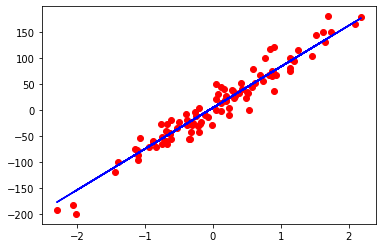

In [23]:
#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()